In [155]:
import os
import warnings
import pandas as pd
import seaborn as sns
from joblib import load
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

In [96]:
plt.rc('font', family='GULIM')
warnings.filterwarnings(action='ignore')
InteractiveShell.ast_node_interactivity = "all"

# Data Check

In [215]:
input_dir = 'Database/'
file_data = 'X_train.csv'
continuous_df = pd.read_csv(os.path.join(input_dir, file_data), index_col=0)
data = pd.read_csv('Database/train.csv')

In [216]:
target = '대출등급'
discrete_list = ['대출기간', '주택소유상태', '대출목적']
discrete_list_2 = ['최근_2년간_연체_횟수', '연체계좌수', '총연체금액', '부채_대비_소득_비율']
continuous_list = ['대출금액', '연간소득', '총계좌수', '근로기간', '이자/대출', '원금/대출']
discrete_df = pd.concat([data[discrete_list], continuous_df[discrete_list_2]], axis=1).dropna()
continuous_df = continuous_df[continuous_list]

discrete_list_eng = ['Loan Term', 'Home Ownership Status', 'Loan Purpose', 'Number of Delinquencies in Last 2 Years',
                     'Number of Delinquent Accounts', 'Total Delinquent Amount', 'Debt-to-Income Ratio']
continuous_list_eng = ['Loan Amount', 'Annual Income', 'Total Number of Accounts', 'Employment Duration',
                       'Interest/Loan', 'Principal/Loan']

In [218]:
column_mapping = {
    '대출기간': 'Loan Term',
    '주택소유상태': 'Home Ownership Status',
    '대출목적': 'Loan Purpose',
    '최근_2년간_연체_횟수': 'Number of Delinquencies in Last 2 Years',
    '연체계좌수': 'Number of Delinquent Accounts',
    '총연체금액': 'Total Delinquent Amount',
    '부채_대비_소득_비율': 'Debt-to-Income Ratio',
    '대출금액': 'Loan Amount',
    '연간소득': 'Annual Income',
    '총계좌수': 'Total Number of Accounts',
    '근로기간': 'Employment Duration',
    '이자/대출': 'Interest/Loan',
    '원금/대출': 'Principal/Loan'
}

# 칼럼 이름 변경
discrete_df.rename(columns=column_mapping, inplace=True)
continuous_df.rename(columns=column_mapping, inplace=True)

(array([ 4064.,  8697., 10862.,  8480.,  9391.,  6438.,  3686.,  4252.,
         2180.,  3578.]),
 array([-1.65461042, -1.25965903, -0.86470764, -0.46975624, -0.07480485,
         0.32014655,  0.71509794,  1.11004934,  1.50500073,  1.89995213,
         2.29490352]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Loan Amount')

(array([4.3891e+04, 1.5146e+04, 1.7740e+03, 5.1500e+02, 1.3200e+02,
        5.4000e+01, 3.8000e+01, 2.3000e+01, 1.8000e+01, 3.7000e+01]),
 array([-1.31727812,  0.20553149,  1.7283411 ,  3.25115071,  4.77396032,
         6.29676993,  7.81957954,  9.34238915, 10.86519876, 12.38800837,
        13.91081798]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Annual Income')

(array([2.3917e+04, 2.8577e+04, 7.6180e+03, 1.3030e+03, 1.7100e+02,
        3.4000e+01, 3.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([-1.76497871, -0.3984991 ,  0.9679805 ,  2.33446011,  3.70093971,
         5.06741931,  6.43389892,  7.80037852,  9.16685813, 10.53333773,
        11.89981734]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Total Number of Accounts')

(array([ 3620.,  9259.,  5405.,  4909.,  3588.,  3565.,  2523.,  2465.,
         3108., 23186.]),
 array([-1.52296862, -1.25757426, -0.99217991, -0.72678555, -0.4613912 ,
        -0.19599684,  0.06939751,  0.33479187,  0.60018623,  0.86558058,
         1.13097494]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Employment Duration')

(array([2.7950e+04, 2.2608e+04, 8.3260e+03, 2.3360e+03, 3.3500e+02,
        5.2000e+01, 1.7000e+01, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-1.44961859, -0.28288945,  0.88383969,  2.05056882,  3.21729796,
         4.3840271 ,  5.55075624,  6.71748537,  7.88421451,  9.05094365,
        10.21767279]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Interest/Loan')

(array([5.913e+04, 2.222e+03, 6.800e+01, 3.700e+01, 3.300e+01, 2.500e+01,
        2.900e+01, 2.200e+01, 3.200e+01, 3.000e+01]),
 array([-1.01327824,  1.11084797,  3.23497417,  5.35910037,  7.48322658,
         9.60735278, 11.73147898, 13.85560518, 15.97973139, 18.10385759,
        20.22798379]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Principal/Loan')

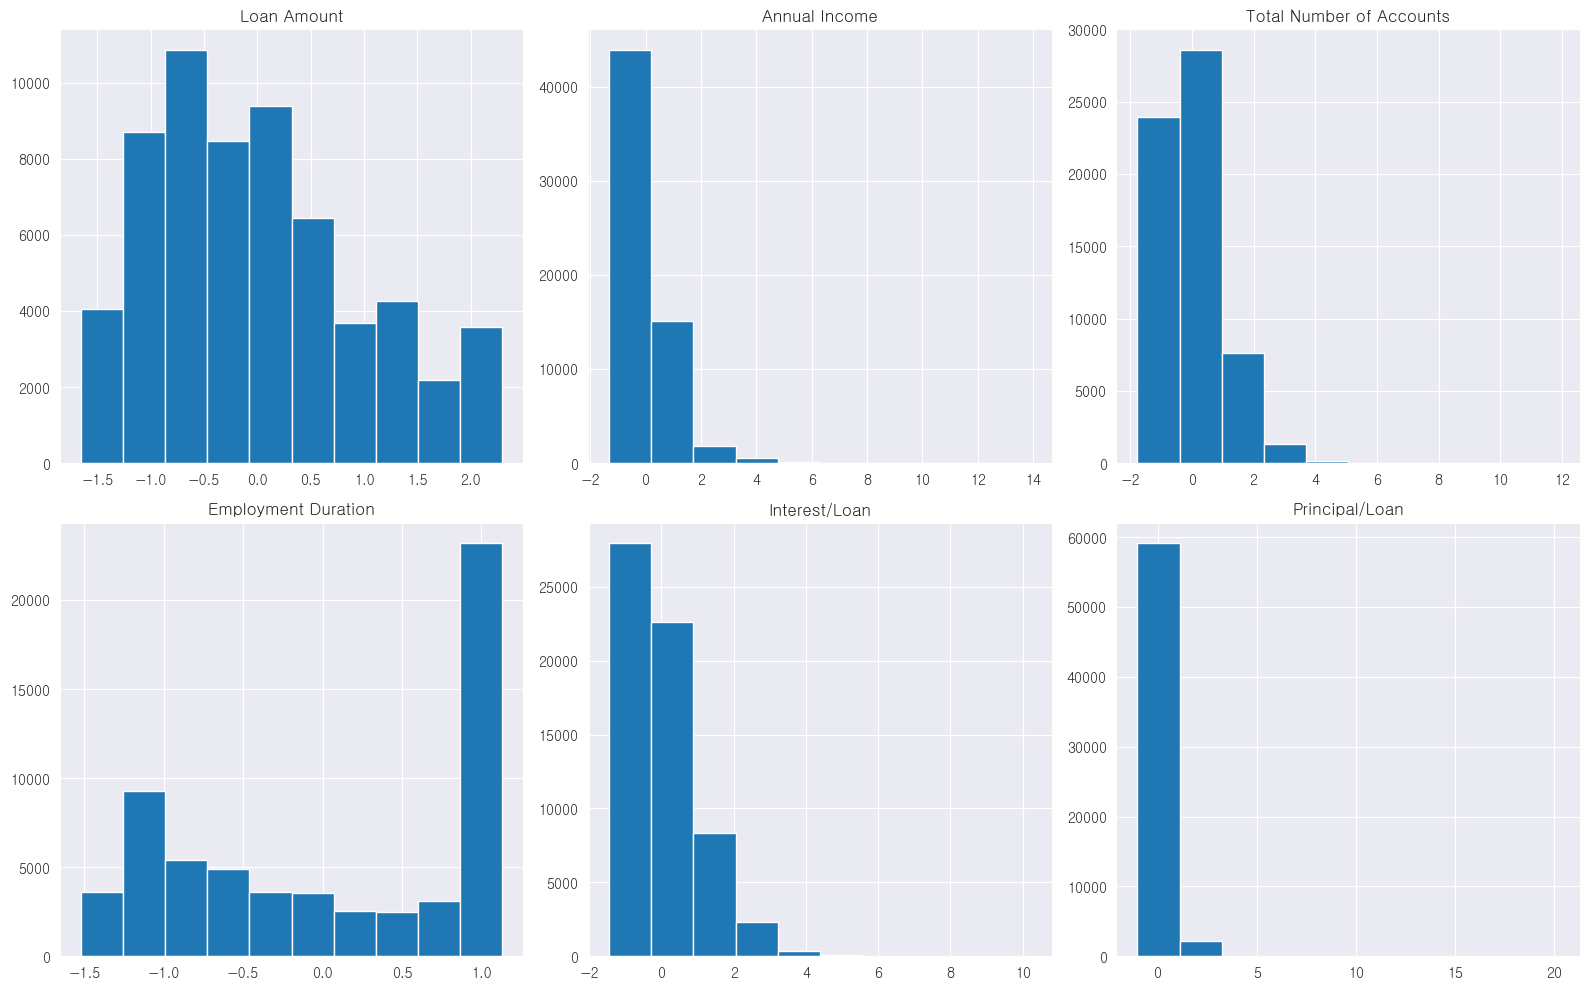

In [219]:
# Create a figure with individual subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Plot histograms for each numerical column
for i, column in enumerate(continuous_list_eng):
    row, col = i // 3, i % 3
    axes[row, col].hist(continuous_df[column], bins=10)
    axes[row, col].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [220]:
variables_list = ['신용 카드', '부채 통합', '주요 구매', '기타', '이사', '주택 개선', '휴가', '소규모 사업', '재생 에너지', '주택', '의료', '자동차']
variables_list_new = ['Credit card', 'Refinancing', 'Purchase', 'Others', 'Move', 'Remodeling', 'Vacation', 'SMB',
                      'Energy', 'House', 'Medical', 'Cars']

variables_mapping = dict(zip(variables_list, variables_list_new))
discrete_df['Loan Purpose'] = discrete_df['Loan Purpose'].map(variables_mapping)

In [223]:
scaler = load('Database/scaler.joblib')
origin = scaler.inverse_transform(continuous_df[continuous_list_eng])
origin_df = pd.DataFrame(origin, columns=continuous_df[continuous_list_eng].columns, index=continuous_df.index)

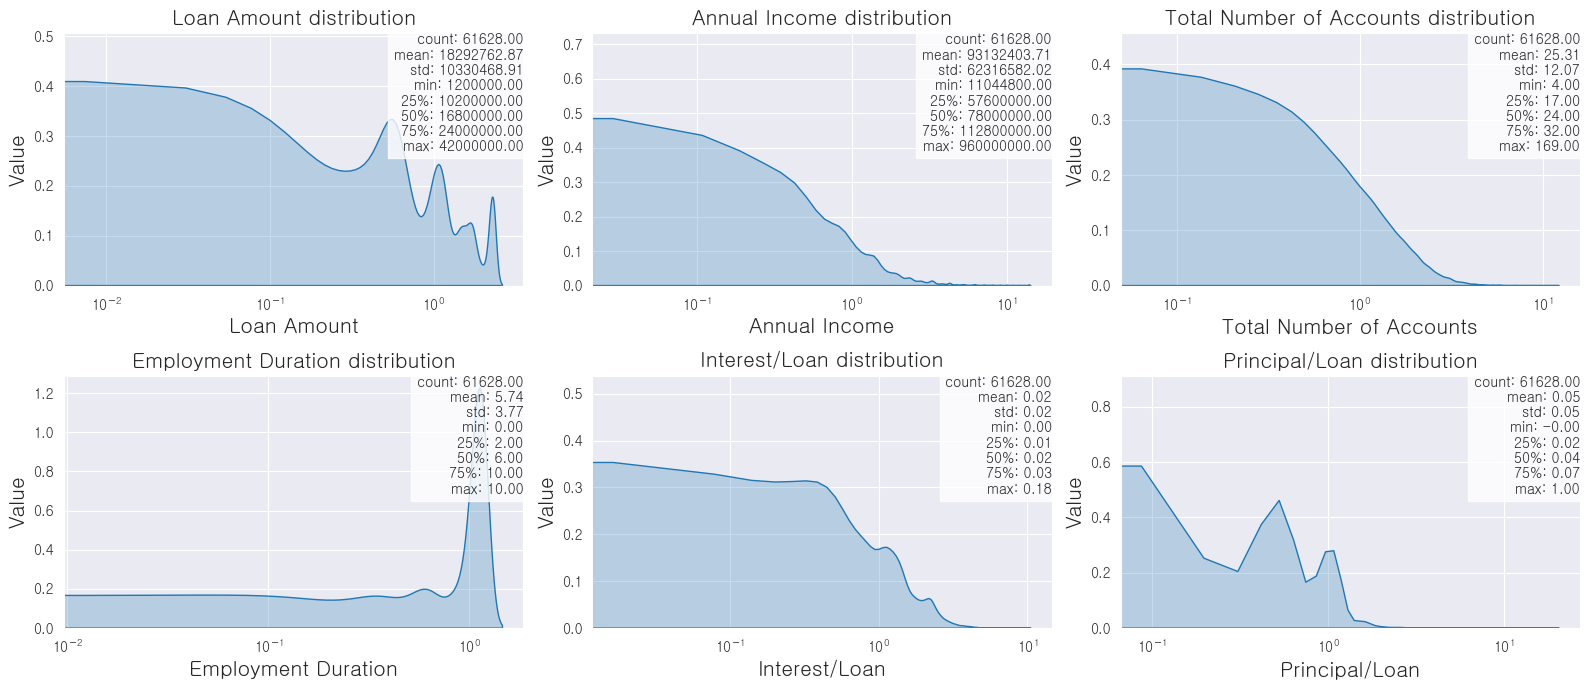

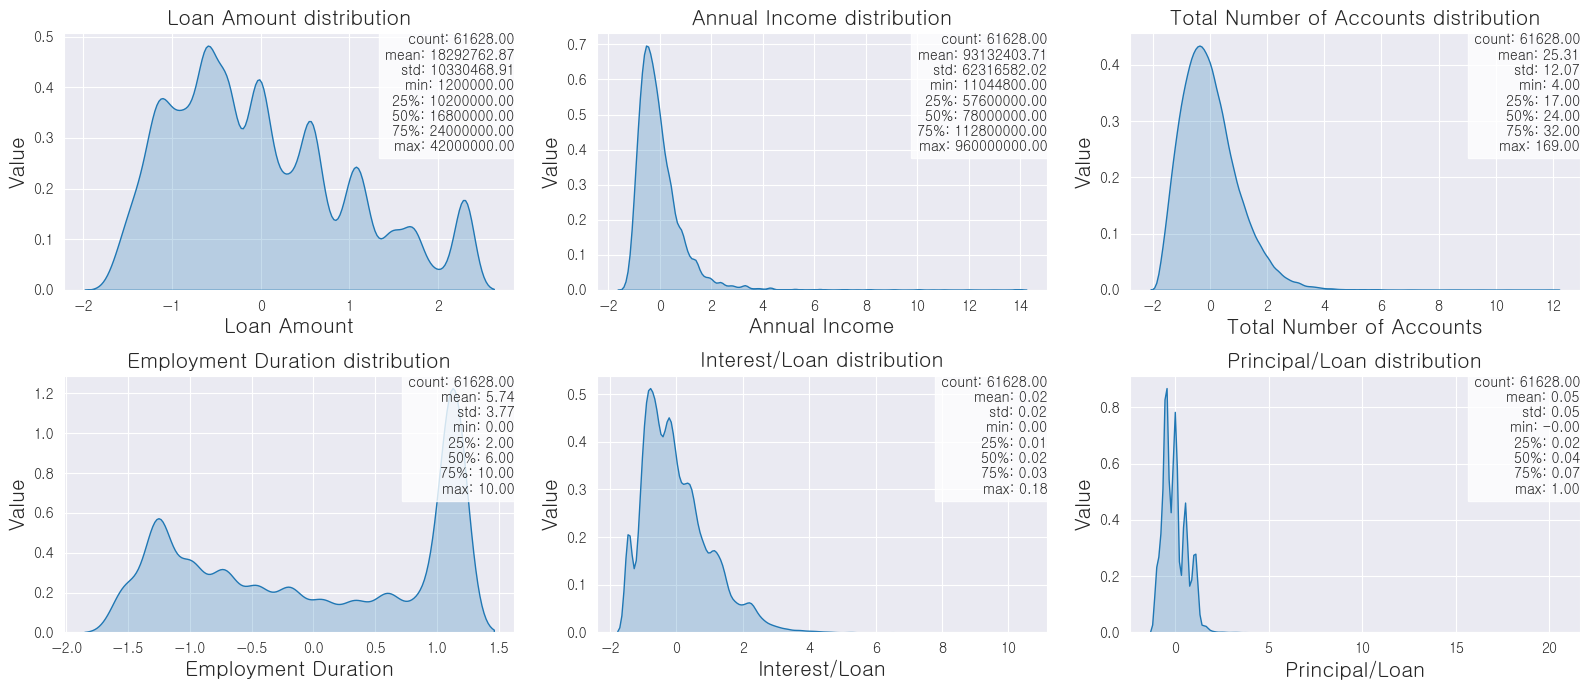

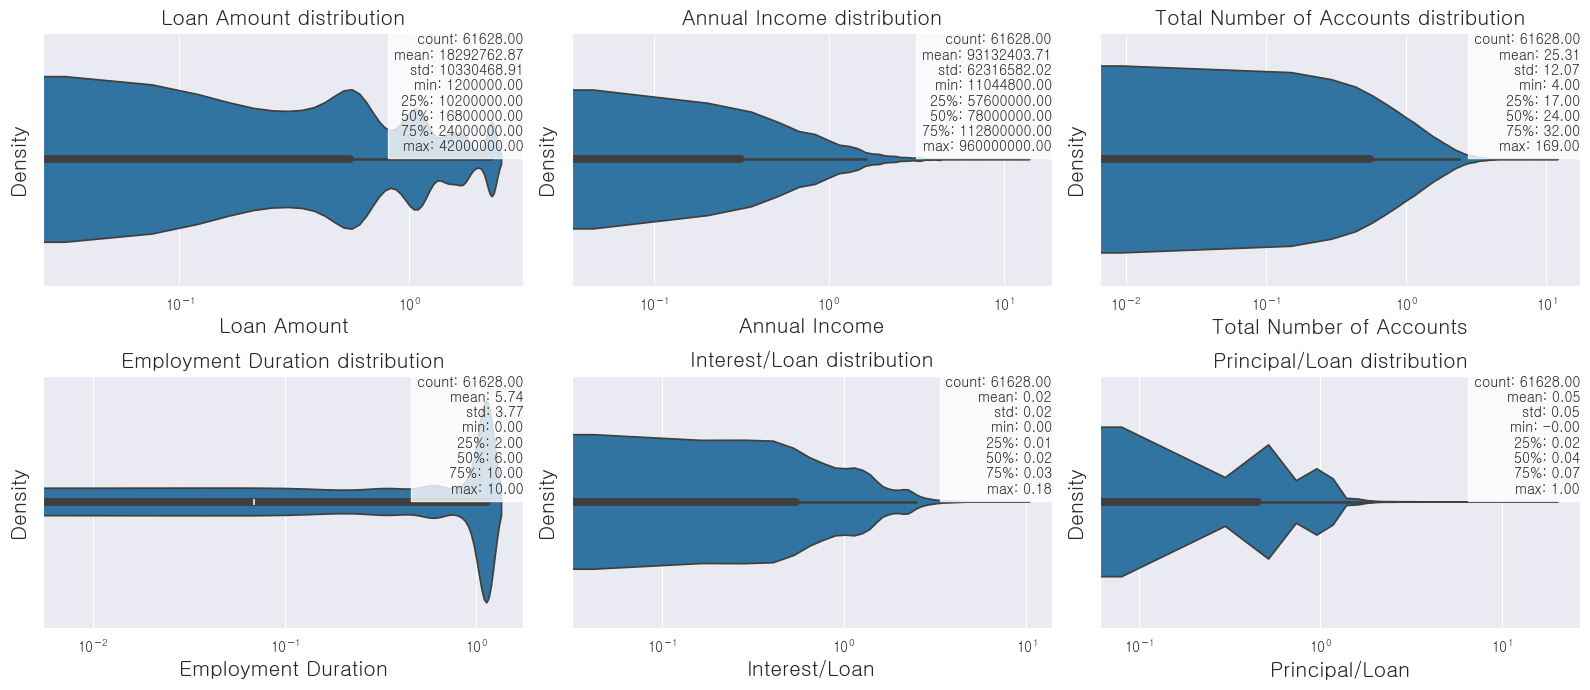

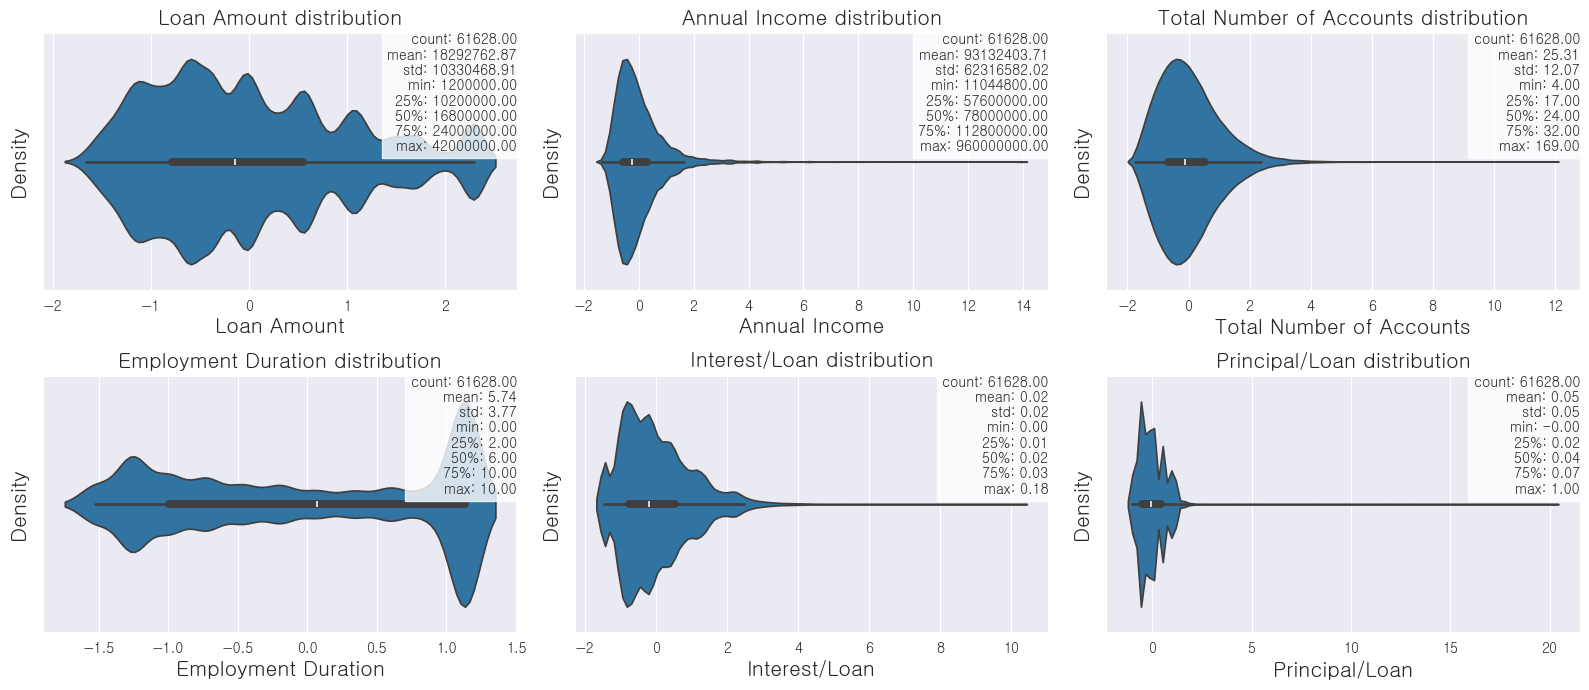

In [257]:
def generate_combined_plot(features, log, kde, k):
    fig, axes = plt.subplots(2, 3, figsize=(16, 7))
    #     fig.suptitle('Combined Plot of Features', fontsize=16)

    for i, feature in enumerate(features):
        if i >= 9:  # We only want 9 plots
            break
        ax = axes[i // 3, i % 3]
        if feature in continuous_list_eng:
            
            desc_stats = origin_df[feature].describe()
            if kde:
                sns.kdeplot(continuous_df[feature], shade=True, ax=ax)
                Name='Value'
                
            if not kde:
                sns.violinplot(data=train, x=feature, ax=ax)
                Name='Density'

            if log:
                ax.set_xscale('log')
            ax.set_title(continuous_df[feature].name + ' distribution', fontsize=15)
            ax.set_xlabel(continuous_df[feature].name, fontsize=15)
            ax.set_ylabel(Name, fontsize=15)

            stats_text = '\n'.join([f'{stat}: {value:.2f}' for stat, value in desc_stats.items()])
            ax.text(1, 1, stats_text, transform=ax.transAxes, fontsize=10,
                    verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.savefig(f'combined_plot_{k}.png')
    plt.show()

# Example usage:
generate_combined_plot(continuous_list_eng, True, True, 1)
generate_combined_plot(continuous_list_eng, False, True, 2)
generate_combined_plot(continuous_list_eng, True, False, 3)
generate_combined_plot(continuous_list_eng, False, False, 4)

In [225]:
data_sorted = pd.concat([continuous_df, data['대출등급']], axis=1).dropna().sort_values(by='대출등급')

<Axes: xlabel='대출등급', ylabel='Loan Amount'>

Text(0.5, 1.0, 'Loan Amount')

Text(0.5, 0, 'Credit Rating')

Text(0, 0.5, 'Loan Amount')

<Axes: xlabel='대출등급', ylabel='Annual Income'>

Text(0.5, 1.0, 'Annual Income')

Text(0.5, 0, 'Credit Rating')

Text(0, 0.5, 'Annual Income')

<Axes: xlabel='대출등급', ylabel='Total Number of Accounts'>

Text(0.5, 1.0, 'Total Number of Accounts')

Text(0.5, 0, 'Credit Rating')

Text(0, 0.5, 'Total Number of Accounts')

<Axes: xlabel='대출등급', ylabel='Employment Duration'>

Text(0.5, 1.0, 'Employment Duration')

Text(0.5, 0, 'Credit Rating')

Text(0, 0.5, 'Employment Duration')

<Axes: xlabel='대출등급', ylabel='Interest/Loan'>

Text(0.5, 1.0, 'Interest/Loan')

Text(0.5, 0, 'Credit Rating')

Text(0, 0.5, 'Interest/Loan')

<Axes: xlabel='대출등급', ylabel='Principal/Loan'>

Text(0.5, 1.0, 'Principal/Loan')

Text(0.5, 0, 'Credit Rating')

Text(0, 0.5, 'Principal/Loan')

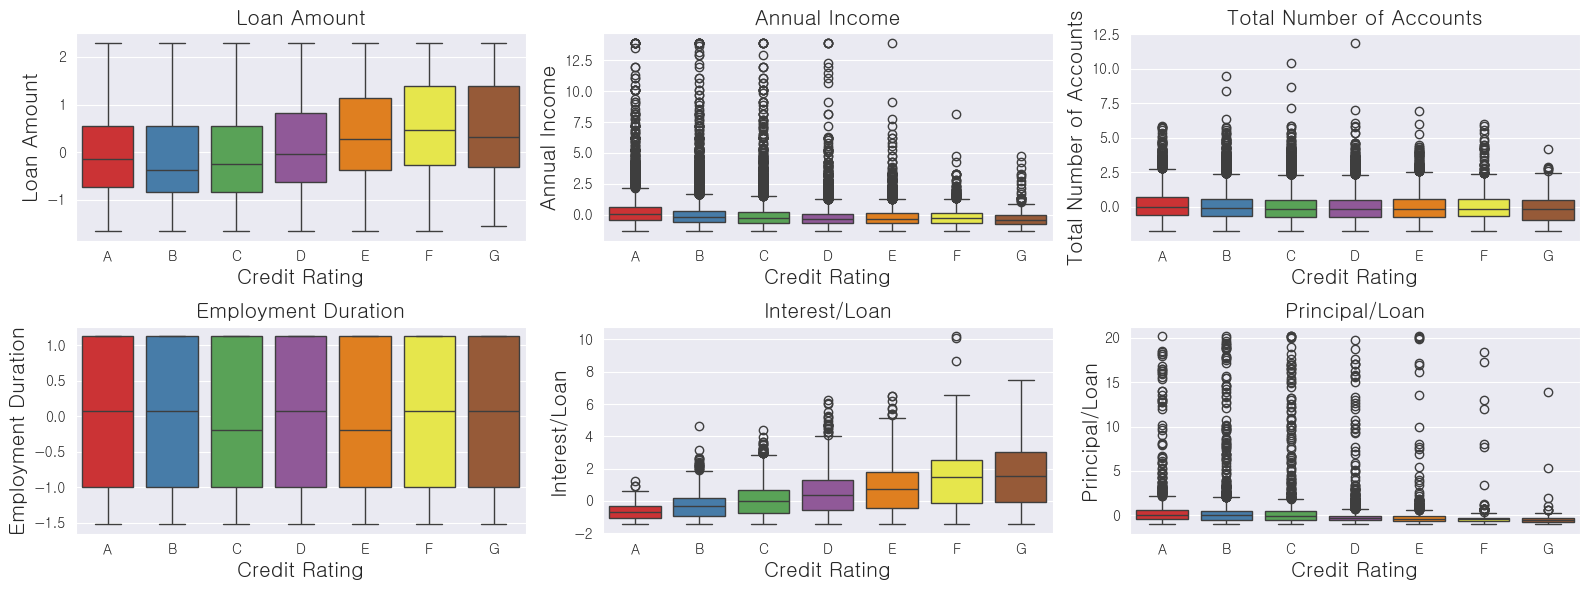

In [255]:
# Create a figure with individual subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))

for i, column in enumerate(continuous_list_eng):
    row, col = i // 3, i % 3
    # 다양한 팔레트 사용 예시
    palettes = ['Set1', 'Set2', 'Set3', 'coolwarm', 'viridis', 'cubehelix']
    sns.boxplot(x=target, y=column, data=data_sorted, ax=axes[row, col],palette='Set1')
    axes[row, col].set_title(continuous_df[column].name, fontsize=15)
    axes[row, col].set_xlabel('Credit Rating', fontsize=15)
    axes[row, col].set_ylabel(continuous_df[column].name, fontsize=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

([<matplotlib.patches.Wedge at 0x16e84155390>,
 [Text(-1.0679405846819419, -0.26363404102883226, 'B'),
  Text(0.5394722331155161, -0.9586290782661241, 'C'),
  Text(1.0173275069415357, 0.41838348870398734, 'A'),
  Text(0.2161230797178815, 1.0785596016972165, 'D'),
  Text(-0.505845100747086, 0.9767910390918677, 'E'),
  Text(-0.7747874672170625, 0.7808356937559716, 'F'),
  Text(-0.8328814037911351, 0.718546148287574, 'G')],
 [Text(-0.5825130461901501, -0.14380038601572667, '29.9%'),
  Text(0.29425758169937233, -0.5228885881451585, '28.7%'),
  Text(0.5549059128772013, 0.22820917565672033, '17.4%'),
  Text(0.11788531620975354, 0.5883052372893908, '13.9%'),
  Text(-0.27591550949841054, 0.5327951122319278, '7.6%'),
  Text(-0.4226113457547613, 0.4259103784123481, '2.0%'),
  Text(-0.45429894752243727, 0.3919342627023131, '0.4%')])

(-1.099998520897369,
 1.099998036821854,
 -1.0999998444812455,
 1.0999991351940324)

Text(0.5, 1.0, 'Credit Rating')

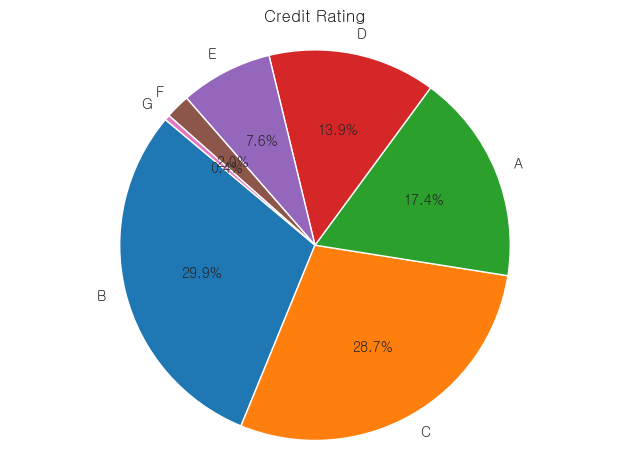

In [227]:
class_counts = data['대출등급'].value_counts()
plt.pie(class_counts, labels=class_counts.index, startangle=140, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Credit Rating')
plt.tight_layout()
plt.show()

In [228]:
data_sorted2 = pd.concat([discrete_df, data['대출등급']], axis=1).dropna().sort_values(by='대출등급')

In [251]:
for i, col in enumerate(discrete_list_eng):
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='대출등급', data=data_sorted2)
    plt.title(f'Credit Rating Distribution based on {col}')
    plt.legend(title=target_column, loc='upper right')
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.savefig(f'plot_{col}.png', dpi=600)
    plt.close()

<Figure size 600x300 with 0 Axes>

<Axes: xlabel='Loan Term', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Loan Term')

([0, 1], [Text(0, 0, ' 36 months'), Text(1, 0, ' 60 months')])

<Figure size 600x300 with 0 Axes>

<Axes: xlabel='Home Ownership Status', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Home Ownership Status')

([0, 1, 2, 3],
 [Text(0, 0, 'RENT'),
  Text(1, 0, 'MORTGAGE'),
  Text(2, 0, 'OWN'),
  Text(3, 0, 'ANY')])

<Figure size 600x300 with 0 Axes>

<Axes: xlabel='Loan Purpose', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Loan Purpose')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Refinancing'),
  Text(1, 0, 'Credit card'),
  Text(2, 0, 'Purchase'),
  Text(3, 0, 'Cars'),
  Text(4, 0, 'Remodeling'),
  Text(5, 0, 'Others'),
  Text(6, 0, 'Medical'),
  Text(7, 0, 'SMB'),
  Text(8, 0, 'Move'),
  Text(9, 0, 'Vacation'),
  Text(10, 0, 'House'),
  Text(11, 0, 'Energy')])

<Figure size 600x300 with 0 Axes>

<Axes: xlabel='Number of Delinquencies in Last 2 Years', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Number of Delinquencies in Last 2 Years')

([0, 1, 2], [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0')])

<Figure size 600x300 with 0 Axes>

<Axes: xlabel='Number of Delinquent Accounts', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Number of Delinquent Accounts')

([0, 1], [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

<Figure size 600x300 with 0 Axes>

<Axes: xlabel='Total Delinquent Amount', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Total Delinquent Amount')

([0, 1], [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

<Figure size 600x300 with 0 Axes>

<Axes: xlabel='Debt-to-Income Ratio', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Debt-to-Income Ratio')

([0, 1, 2, 3, 4],
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0')])

<Axes: xlabel='Loan Term', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Loan Term')

<Axes: xlabel='Home Ownership Status', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Home Ownership Status')

<Axes: xlabel='Loan Purpose', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Loan Purpose')

<Axes: xlabel='Number of Delinquencies in Last 2 Years', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Number of Delinquencies in Last 2 Years')

<Axes: xlabel='Number of Delinquent Accounts', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Number of Delinquent Accounts')

<Axes: xlabel='Total Delinquent Amount', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Total Delinquent Amount')

<Axes: xlabel='Debt-to-Income Ratio', ylabel='count'>

Text(0.5, 1.0, 'Credit Rating Distribution based on Debt-to-Income Ratio')

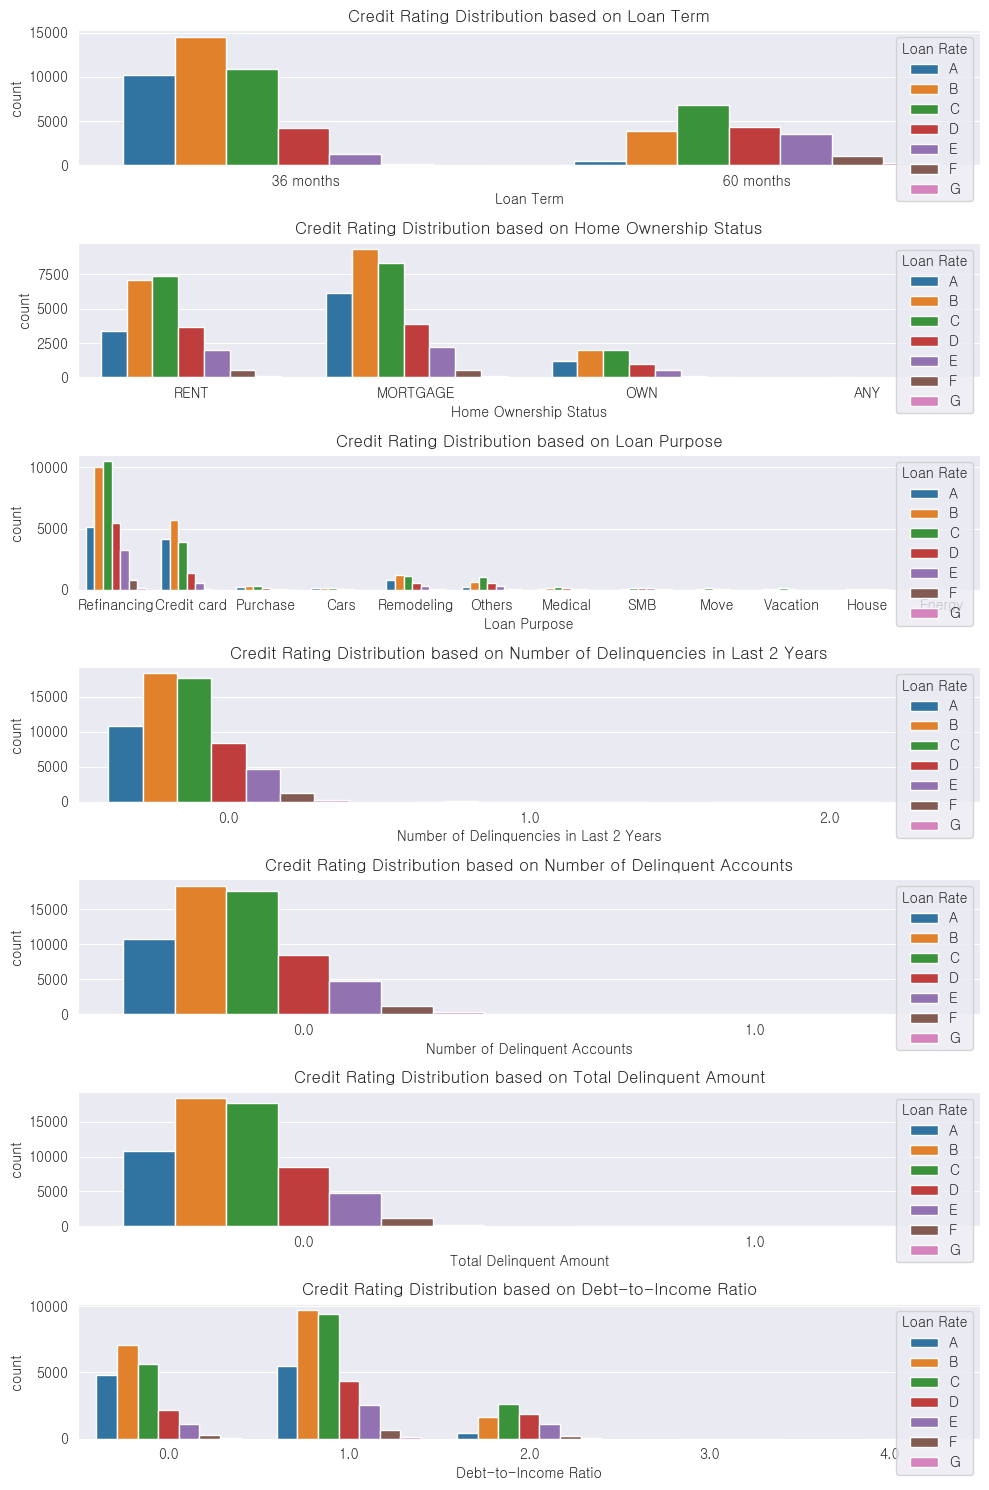

In [243]:
# 서브플롯 생성
fig, axes = plt.subplots(nrows=len(discrete_list_eng), ncols=1, figsize=(10, 5 * len(discrete_list)))
target_column='Loan Rate'
# 각 이산형 변수에 대해 타겟 변수의 분포를 시각화
for i, col in enumerate(discrete_list_eng):
    sns.countplot(x=col, hue='대출등급', data=data_sorted2, ax=axes[i])
    axes[i].set_title(f'Credit Rating Distribution based on {col}')
    axes[i].legend(title=target_column, loc='upper right')

plt.tight_layout()
plt.savefig(f'plot.png')
plt.show()